# Importing Python libraries

In [56]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

# ------------------------------------------------------------------------------------------------------

## Settings

In [57]:
cryptoTicker = "BTC"
cryptoPair = "USDT"

trainTestSplit = 0.8

# ------------------------------------------------------------------------------------------------------

### Loading the twitter data

In [58]:
data=pd.read_csv('Datasets/dataFileBTC2.csv')

In [59]:
li = data['tweet'].str.lower().str.cat(sep=' ')

# Removing punctuation,numbers and returns list of words

In [60]:
li2 = re.sub('[^A-Za-z]+', ' ', li)

# Removing the stopwords from the text

In [61]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')        
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Getting Tokenization of the text

In [62]:
word_tokens = word_tokenize(li2)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Removing characters which have length less than 2  

In [63]:
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Removing numbers

In [64]:
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

# Frequency distribution of aspect words 

In [65]:
word_dist = nltk.FreqDist(cleaned_data_title)
top100_words = pd.DataFrame(word_dist.most_common(100),
                    columns=['Word', 'Frequency'])

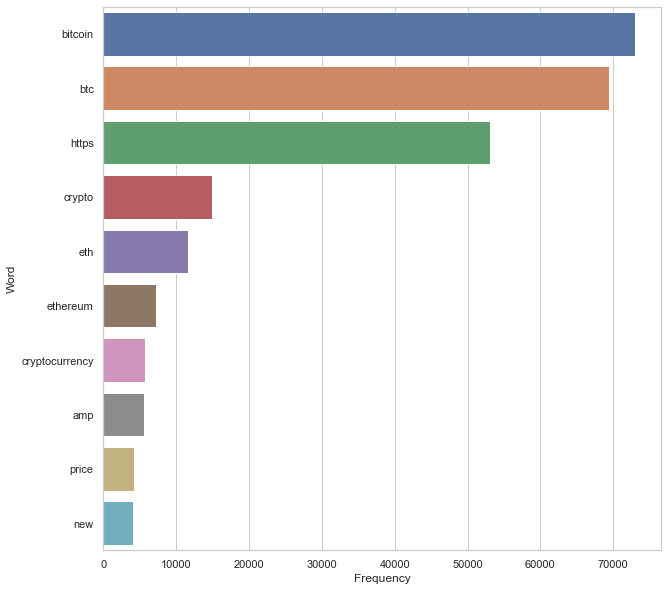

In [66]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

# SentimentIntensityAnalyzer for getting sentiments

In [67]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [68]:
data["Polarity"] = data["tweet"].apply(sentiment)

In [69]:
data = data[['date','time','tweet','Polarity']]

In [70]:
data.tail()

,date,time,tweet,Polarity
63876,2021-01-01,00:32:02,These terrible #Bitcoin price predictions show...,0.1263
63877,2021-01-01,00:10:40,2020-12-31 CoinShuffle++ transaction volume wa...,0.0000
63878,2021-01-01,00:06:07,Wow. Just wow. #Bitcoin #Etheruem #XRP #Bitcoi...,0.8225
63879,2021-01-01,00:04:20,New GIVEAWAY ! #Okcash $ok $BTC #ETH “30” WIN...,0.9378
63880,2021-01-01,00:04:12,New GIVEAWAY ! #Okcash $ok $BTC #ETH “30” WIN...,0.9378


# Getting sentiments based on the popularity score

In [71]:
def sentiments(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [72]:
data['Sentiments'] = data.apply(sentiments, axis=1)

# sentiments with their counts

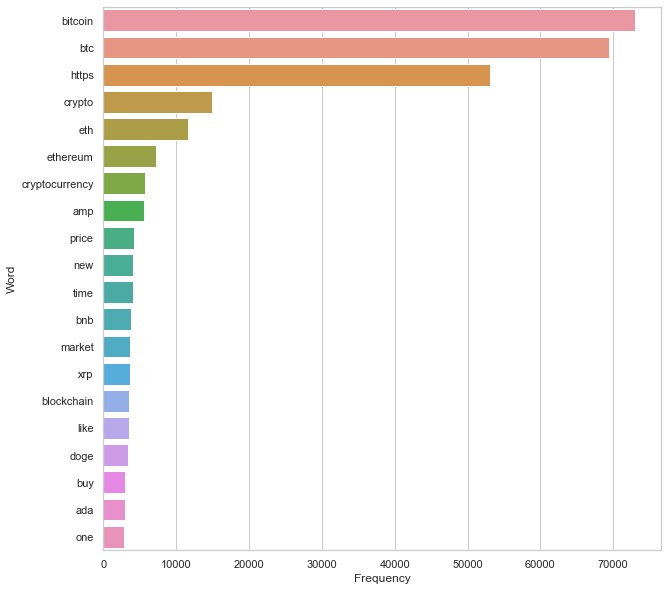

In [73]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(20))

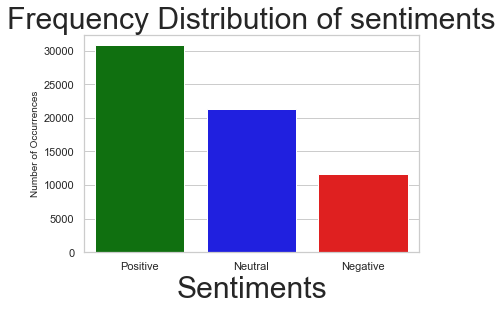

In [74]:
carrier_count = data["Sentiments"].value_counts()
sns.set(style="whitegrid")
sns.barplot(carrier_count.index, carrier_count.values, palette=dict(Neutral="blue", Positive="Green", Negative="Red"))
plt.title('Frequency Distribution of sentiments', fontsize=30)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Sentiments', fontsize=30)
plt.show()

### Loading dataset price data

In [75]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
priceData = pd.DataFrame(klines)
priceData.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
priceData.index = [dt.datetime.fromtimestamp(x/1000.0) for x in priceData.close_time]
#priceData=priceData[['open', 'high', 'low', 'close']]
priceData=priceData[['close']]
priceData.head()
priceData = priceData.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [76]:
priceData.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,29278.40000000
2021-01-01 07:59:59.999,29092.83000000
2021-01-01 11:59:59.999,29313.49000000
2021-01-01 15:59:59.999,29188.67000000
2021-01-01 19:59:59.999,29029.04000000


### Five last records of data

In [77]:
priceData.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,47191.09000000
2021-12-31 11:59:59.999,47975.76000000
2021-12-31 15:59:59.999,48005.37000000
2021-12-31 19:59:59.999,45728.28000000
2021-12-31 23:59:59.999,46216.93000000


### Coloumns/features in data

In [78]:
priceData.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [79]:
print('lenght of data is', len(priceData)) #lenght of data

lenght of data is 2190


In [80]:
data['Sentiments'].value_counts()

Positive    30823
Neutral     21381
Negative    11677
Name: Sentiments, dtype: int64

### Shape of data

In [81]:
data.shape #shape of data

(63881, 5)

### Data information

In [82]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63881 entries, 0 to 63880
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        63881 non-null  object 
 1   time        63881 non-null  object 
 2   tweet       63881 non-null  object 
 3   Polarity    63881 non-null  float64
 4   Sentiments  63881 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.4+ MB


In [83]:
a=data['Sentiments'].head(10)
aa=data['Sentiments'].value_counts()[0]
aa

30823

In [84]:
data.head(10-8)

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:55:18,"Você perdeu o bonde do #bitcoin em 2013, 14, 1...",0.0000,Neutral
1,2021-12-30,23:47:18,"Calling it now, 2022 will be the year of the #...",0.2732,Positive


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63881 entries, 0 to 63880
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        63881 non-null  object 
 1   time        63881 non-null  object 
 2   tweet       63881 non-null  object 
 3   Polarity    63881 non-null  float64
 4   Sentiments  63881 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.4+ MB


In [86]:
#data=data.head(1000)

In [87]:
data['Sentiments'].value_counts()

Positive    30823
Neutral     21381
Negative    11677
Name: Sentiments, dtype: int64

### Data types of all coloumns

In [88]:
data.dtypes #data types of data

date           object
time           object
tweet          object
Polarity      float64
Sentiments     object
dtype: object

### Checking missing Values

In [89]:
data[data.isnull().any(axis=1)].head() #checking the null values 

,date,time,tweet,Polarity,Sentiments


### Count of missing values

In [90]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [91]:
data.isnull().values.any() #checking the null values 

False

In [92]:
data.iloc[9:25]

,date,time,tweet,Polarity,Sentiments
9,2021-12-30,22:30:22,I’m so bullish on this project and team. If yo...,0.3400,Positive
10,2021-12-30,21:48:51,When #Bitcoin does hit 100k which is ultimatel...,0.2023,Positive
11,2021-12-30,21:17:42,Why is the Commission of the powerhouse footba...,0.0000,Neutral
12,2021-12-30,21:03:02,"A demonstrative deck of our alpha #DeFi app, a...",0.6800,Positive
13,2021-12-30,20:31:17,Even before the merge happens ETH is nearly ne...,0.8215,Positive
14,2021-12-30,20:26:38,The hype around $coti is rising with #cardano'...,0.0000,Neutral
15,2021-12-30,20:18:04,"$FLUX Daily Highlights, 30 December 2021 - Cur...",0.8494,Positive
16,2021-12-30,20:08:30,#Bitcoin 8h Heikin Ashi Candles showing a tren...,0.0000,Neutral
17,2021-12-30,20:05:45,Ravencoin codes intent was to create a #Bitcoi...,0.8381,Positive
18,2021-12-30,19:27:26,"$MARA ""has outperformed the #Bitcoin price so ...",0.3818,Positive


In [93]:
data.iloc[:25]

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:55:18,"Você perdeu o bonde do #bitcoin em 2013, 14, 1...",0.0000,Neutral
1,2021-12-30,23:47:18,"Calling it now, 2022 will be the year of the #...",0.2732,Positive
2,2021-12-30,23:36:46,The scarcity argument for #Bitcoin is beyond r...,-0.6456,Negative
3,2021-12-30,23:36:00,"Thanks to Proton-wrapped Bitcoin (XBTC), that ...",0.8268,Positive
4,2021-12-30,23:30:59,$AMZN vs. $BTC continued analysis. #Amazon wil...,0.0772,Positive
5,2021-12-30,23:21:15,We're proud of you. Please show amazing perfo...,0.9524,Positive
6,2021-12-30,23:09:09,Kendimi yine yalnız ve çıplak hissediyorum 🤨 #...,0.0000,Neutral
7,2021-12-30,22:47:00,Imagining A Central Bank Wipeout Of Bitcoin In...,-0.4215,Negative
8,2021-12-30,22:41:16,If you're a business owner you should heavily ...,0.8622,Positive
9,2021-12-30,22:30:22,I’m so bullish on this project and team. If yo...,0.3400,Positive


### Counts of missing values in each column

In [94]:
data.isnull().sum() #checking the null values columns wise 

date          0
time          0
tweet         0
Polarity      0
Sentiments    0
dtype: int64

In [95]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
priceData['close']=priceData['close'].astype(float)

### Spliting date into day, month and year

In [96]:
priceData['date'] = priceData.index # taking dates in date column 
priceData.sort_index(ascending=True, inplace=True)
priceData['Month'] = priceData['date'].dt.month # extracting months from data
priceData['Day'] = priceData['date'].dt.day # extracting day from data
priceData['Year'] = priceData['date'].dt.year # extracting year from data
priceData['Hour'] = priceData['date'].dt.hour # extracting year from data
priceData['Minutes'] = priceData['date'].dt.minute # extracting year from data

### Close price with respect to year 

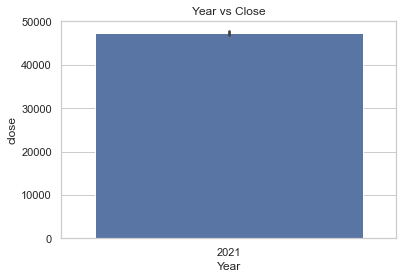

In [97]:
sns.barplot(x='Year', y='close', data=priceData).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

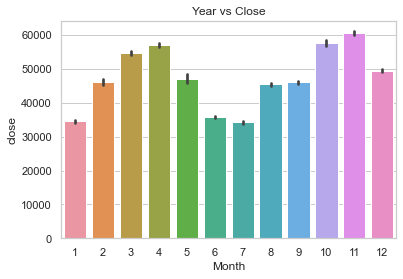

In [98]:
sns.barplot(x='Month', y='close', data=priceData).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Merging entiment with price data

# ------------------------------------------------------------------------------------------------------

In [99]:
data.head()

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:55:18,"Você perdeu o bonde do #bitcoin em 2013, 14, 1...",0.0000,Neutral
1,2021-12-30,23:47:18,"Calling it now, 2022 will be the year of the #...",0.2732,Positive
2,2021-12-30,23:36:46,The scarcity argument for #Bitcoin is beyond r...,-0.6456,Negative
3,2021-12-30,23:36:00,"Thanks to Proton-wrapped Bitcoin (XBTC), that ...",0.8268,Positive
4,2021-12-30,23:30:59,$AMZN vs. $BTC continued analysis. #Amazon wil...,0.0772,Positive


In [100]:
priceData.head(10)

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,29278.40,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,29092.83,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,29313.49,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,29188.67,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,29029.04,2021-01-01 19:59:59.999,1,1,2021,19,59
2021-01-01 23:59:59.999,29331.69,2021-01-01 23:59:59.999,1,1,2021,23,59
2021-01-02 03:59:59.999,29351.95,2021-01-02 03:59:59.999,1,2,2021,3,59
2021-01-02 07:59:59.999,29750.00,2021-01-02 07:59:59.999,1,2,2021,7,59
2021-01-02 11:59:59.999,29755.00,2021-01-02 11:59:59.999,1,2,2021,11,59
2021-01-02 15:59:59.999,31691.29,2021-01-02 15:59:59.999,1,2,2021,15,59


In [101]:
priceData['sentimentCount'] = 0

In [102]:
for i, row in enumerate(data.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] -= 1
    else:
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] -= 1

In [103]:
priceData.loc[priceData['sentimentCount'] == 0]

,close,date,Month,Day,Year,Hour,Minutes,sentimentCount
2021-01-04 23:59:59.999,31988.71,2021-01-04 23:59:59.999,1,4,2021,23,59,0
2021-01-23 07:59:59.999,32931.18,2021-01-23 07:59:59.999,1,23,2021,7,59,0
2021-01-31 11:59:59.999,33563.23,2021-01-31 11:59:59.999,1,31,2021,11,59,0
2021-02-11 03:40:54.773,44582.07,2021-02-11 03:40:54.773,2,11,2021,3,40,0
2021-02-20 19:59:59.999,56975.12,2021-02-20 19:59:59.999,2,20,2021,19,59,0
...,...,...,...,...,...,...,...,...
2021-12-31 07:59:59.999,47191.09,2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,47975.76,2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,48005.37,2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,45728.28,2021-12-31 19:59:59.999,12,31,2021,19,59,0


In [104]:
priceData.iloc[2150:]

,close,date,Month,Day,Year,Hour,Minutes,sentimentCount
2021-12-25 11:59:59.999,50682.97,2021-12-25 11:59:59.999,12,25,2021,11,59,6
2021-12-25 15:59:59.999,50659.91,2021-12-25 15:59:59.999,12,25,2021,15,59,1
2021-12-25 19:59:59.999,50889.15,2021-12-25 19:59:59.999,12,25,2021,19,59,5
2021-12-25 23:59:59.999,50399.66,2021-12-25 23:59:59.999,12,25,2021,23,59,14
2021-12-26 03:59:59.999,49675.56,2021-12-26 03:59:59.999,12,26,2021,3,59,1
2021-12-26 07:59:59.999,49930.39,2021-12-26 07:59:59.999,12,26,2021,7,59,7
2021-12-26 11:59:59.999,49748.89,2021-12-26 11:59:59.999,12,26,2021,11,59,2
2021-12-26 15:59:59.999,50049.34,2021-12-26 15:59:59.999,12,26,2021,15,59,10
2021-12-26 19:59:59.999,50342.51,2021-12-26 19:59:59.999,12,26,2021,19,59,7
2021-12-26 23:59:59.999,50775.49,2021-12-26 23:59:59.999,12,26,2021,23,59,7


# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

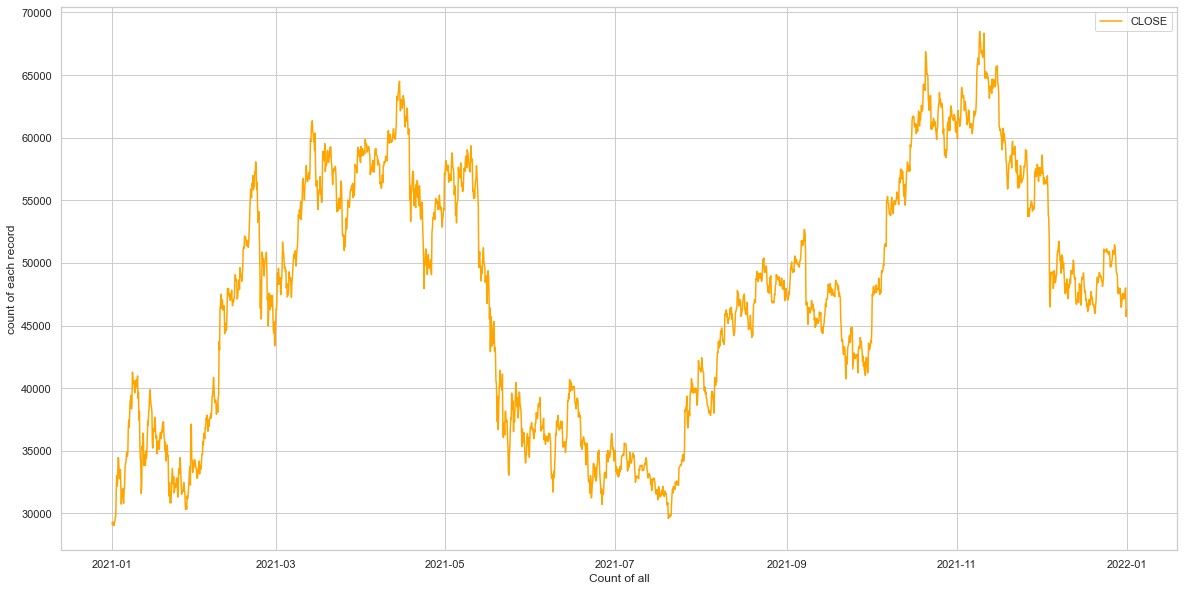

In [105]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(priceData.index, priceData['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [106]:
X=priceData.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

,Month,Day,Year,Hour,Minutes,sentimentCount
2021-01-01 03:59:59.999,1,1,2021,3,59,10
2021-01-01 07:59:59.999,1,1,2021,7,59,8
2021-01-01 11:59:59.999,1,1,2021,11,59,5
2021-01-01 15:59:59.999,1,1,2021,15,59,5
2021-01-01 19:59:59.999,1,1,2021,19,59,5
...,...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,12,31,2021,19,59,0


### Taking target as output

In [107]:
y=priceData['close'] # output close 
y #output 

2021-01-01 03:59:59.999    29278.40
2021-01-01 07:59:59.999    29092.83
2021-01-01 11:59:59.999    29313.49
2021-01-01 15:59:59.999    29188.67
2021-01-01 19:59:59.999    29029.04
                             ...   
2021-12-31 07:59:59.999    47191.09
2021-12-31 11:59:59.999    47975.76
2021-12-31 15:59:59.999    48005.37
2021-12-31 19:59:59.999    45728.28
2021-12-31 23:59:59.999    46216.93
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [108]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# SARIMAX

In [109]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=9866.597
ARIMA(0, 0, 1) RMSE=9220.936
ARIMA(0, 0, 2) RMSE=9322.486
ARIMA(0, 1, 0) RMSE=17328.206
ARIMA(0, 1, 1) RMSE=17258.448
ARIMA(0, 1, 2) RMSE=17428.131
ARIMA(0, 2, 0) RMSE=111212.534
ARIMA(0, 2, 1) RMSE=12529.277
ARIMA(0, 2, 2) RMSE=12601.331
ARIMA(1, 0, 0) RMSE=10607.339
ARIMA(1, 0, 1) RMSE=10457.856
ARIMA(1, 0, 2) RMSE=10639.859
ARIMA(1, 1, 0) RMSE=17268.464
ARIMA(1, 1, 1) RMSE=17324.411
ARIMA(1, 1, 2) RMSE=16670.378
ARIMA(1, 2, 0) RMSE=63590.971
ARIMA(1, 2, 1) RMSE=12628.722
ARIMA(1, 2, 2) RMSE=12728.478
ARIMA(2, 0, 0) RMSE=10409.554
ARIMA(2, 0, 1) RMSE=9200.352
ARIMA(2, 0, 2) RMSE=12498.285
ARIMA(2, 1, 0) RMSE=17377.787
ARIMA(2, 1, 1) RMSE=17340.776
ARIMA(2, 1, 2) RMSE=20687.458
ARIMA(2, 2, 0) RMSE=87927.082
ARIMA(2, 2, 1) RMSE=12628.097
ARIMA(2, 2, 2) RMSE=12243.340
ARIMA(4, 0, 0) RMSE=16714.774
ARIMA(4, 0, 1) RMSE=10063.901
ARIMA(4, 0, 2) RMSE=12869.297
ARIMA(4, 1, 0) RMSE=17379.747
ARIMA(4, 1, 1) RMSE=17594.550
ARIMA(4, 1, 2) RMSE=15743.091
ARIMA(4, 2, 0

In [110]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [111]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [112]:
test_mse1=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  16306211.67685


# MAE

In [113]:
test_MAE1=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  3279.46801


# RMSE

In [114]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  4038.09506


# MAPE

In [115]:
test_mape1=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.0613


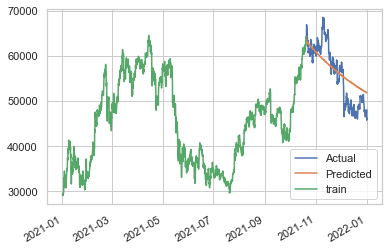

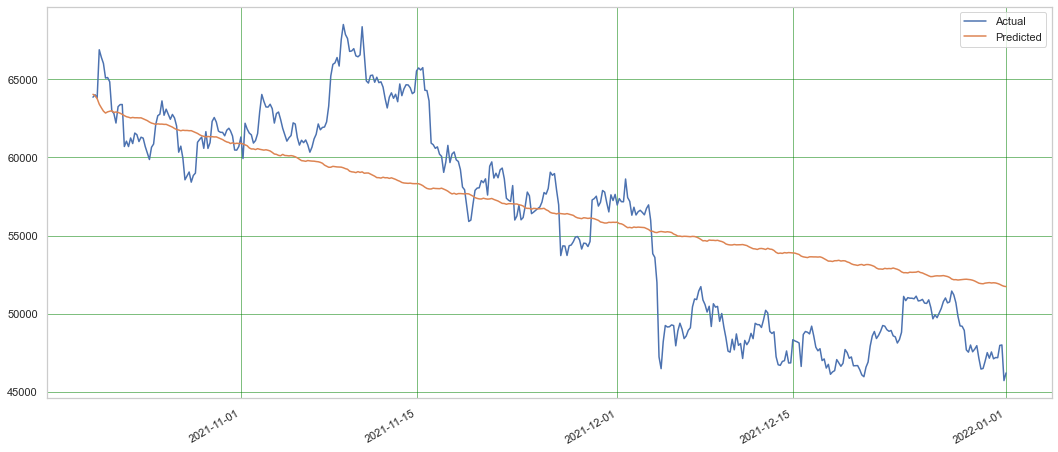

In [116]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# ARIMAX

In [117]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=arima_order)
    
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=39573.084
ARIMA(0, 0, 1) RMSE=55806.299
ARIMA(0, 0, 2) RMSE=39427.390
ARIMA(0, 1, 0) RMSE=10598.408
ARIMA(0, 1, 1) RMSE=10587.073
ARIMA(0, 1, 2) RMSE=10668.479
ARIMA(0, 2, 0) RMSE=36473.865
ARIMA(0, 2, 1) RMSE=17291.996
ARIMA(0, 2, 2) RMSE=17255.714
ARIMA(1, 0, 0) RMSE=10564.550
ARIMA(1, 0, 1) RMSE=10585.739
ARIMA(1, 0, 2) RMSE=16892.569
ARIMA(1, 1, 0) RMSE=10593.020
ARIMA(1, 1, 1) RMSE=10608.507
ARIMA(1, 1, 2) RMSE=10694.202
ARIMA(1, 2, 0) RMSE=179155.100
ARIMA(1, 2, 1) RMSE=17255.849
ARIMA(1, 2, 2) RMSE=17245.727
ARIMA(2, 0, 0) RMSE=35137.227
LU decomposition error.
ARIMA(2, 0, 2) RMSE=9939.990
ARIMA(2, 1, 0) RMSE=10645.332
ARIMA(2, 1, 1) RMSE=10675.231
ARIMA(2, 1, 2) RMSE=10723.965
ARIMA(2, 2, 0) RMSE=190156.835
ARIMA(2, 2, 1) RMSE=17356.252
ARIMA(2, 2, 2) RMSE=28218.023
ARIMA(4, 0, 0) RMSE=37009.978
LU decomposition error.
ARIMA(4, 0, 2) RMSE=43003.650
ARIMA(4, 1, 0) RMSE=10639.811
ARIMA(4, 1, 1) RMSE=10546.122
ARIMA(4, 1, 2) RMSE=10609.787
ARIMA(4, 2, 0) RMSE=1

In [118]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=(best_cfg))
results=model.fit()

In [119]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [120]:
test_mse2=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  39239291.65668


# MAE

In [121]:
test_MAE2=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  4695.12624


# RMSE

In [122]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  6264.12737


# MAPE

In [123]:
test_mape2=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.08572


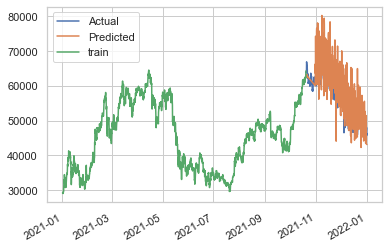

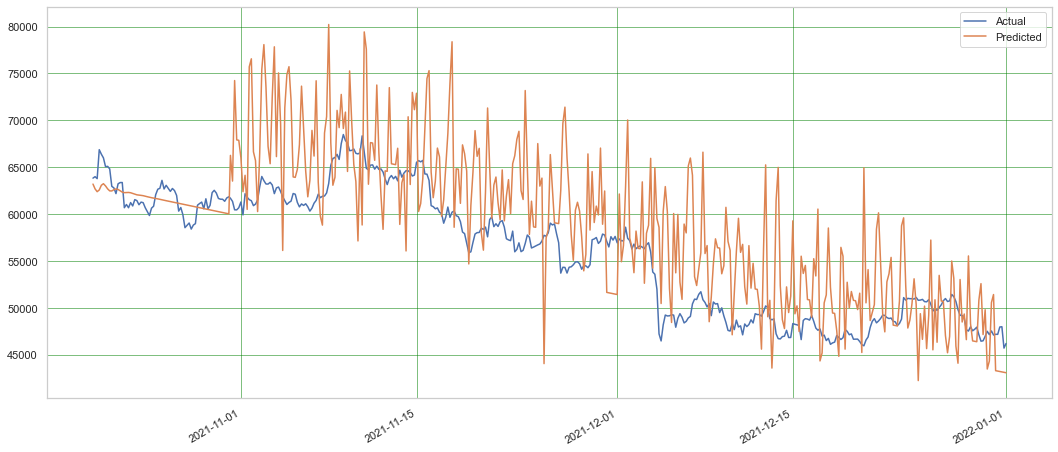

In [124]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [125]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [126]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 908840960.38612926
Iteration 2, loss = 888514910.06906223
Iteration 3, loss = 868200056.43723416
Iteration 4, loss = 847595124.84866905
Iteration 5, loss = 826080077.76384497
Iteration 6, loss = 803626768.99742436
Iteration 7, loss = 779710819.39069104
Iteration 8, loss = 754220396.28299594
Iteration 9, loss = 726680316.67760396
Iteration 10, loss = 697317959.91989088
Iteration 11, loss = 666047458.79753983
Iteration 12, loss = 632803284.17715693
Iteration 13, loss = 597903510.08766949
Iteration 14, loss = 561501417.26795447
Iteration 15, loss = 523523605.18416327
Iteration 16, loss = 484879325.37438756
Iteration 17, loss = 445571264.77724266
Iteration 18, loss = 406116395.11408013
Iteration 19, loss = 366962482.56973499
Iteration 20, loss = 328449771.43448001
Iteration 21, loss = 291262266.20797735
Iteration 22, loss = 255595996.77995706
Iteration 23, loss = 222207716.35467675
Iteration 24, loss = 191069998.31050393
Iteration 25, loss = 162563413.45949540
Iteration

Iteration 160, loss = 46058290.78305967
Iteration 161, loss = 46035391.91710638
Iteration 162, loss = 46009543.99975241
Iteration 163, loss = 46011413.16245433
Iteration 164, loss = 46015696.23858327
Iteration 165, loss = 46001585.26233803
Iteration 166, loss = 45970145.55792459
Iteration 167, loss = 45967669.42655084
Iteration 168, loss = 45952764.35776341
Iteration 169, loss = 45913516.51224810
Iteration 170, loss = 45899913.51842690
Iteration 171, loss = 45924792.39394650
Iteration 172, loss = 45886704.75336997
Iteration 173, loss = 45878040.61891094
Iteration 174, loss = 45858621.34226879
Iteration 175, loss = 45849241.33249912
Iteration 176, loss = 45820900.57254963
Iteration 177, loss = 45842982.30387074
Iteration 178, loss = 45808664.03059202
Iteration 179, loss = 45797518.61583193
Iteration 180, loss = 45762395.23487306
Iteration 181, loss = 45751912.95876566
Iteration 182, loss = 45739223.54484563
Iteration 183, loss = 45718269.48243908
Iteration 184, loss = 45716542.55866008


Iteration 112, loss = 46755869.64961599
Iteration 113, loss = 46750700.66556241
Iteration 114, loss = 46745482.98141335
Iteration 115, loss = 46737730.87355048
Iteration 116, loss = 46731603.74076156
Iteration 117, loss = 46722641.00198468
Iteration 118, loss = 46726557.31463071
Iteration 119, loss = 46708621.35140409
Iteration 120, loss = 46700233.07701430
Iteration 121, loss = 46689610.87120546
Iteration 122, loss = 46684414.59687790
Iteration 123, loss = 46678387.91575894
Iteration 124, loss = 46674657.56924461
Iteration 125, loss = 46663645.82751580
Iteration 126, loss = 46656684.29611496
Iteration 127, loss = 46651425.70121296
Iteration 128, loss = 46647088.87430757
Iteration 129, loss = 46633697.99282937
Iteration 130, loss = 46625929.15566020
Iteration 131, loss = 46617475.43979783
Iteration 132, loss = 46607431.42504054
Iteration 133, loss = 46602407.95306534
Iteration 134, loss = 46593266.04483356
Iteration 135, loss = 46591068.75703728
Iteration 136, loss = 46588868.63393707


Iteration 334, loss = 44513643.84643885
Iteration 335, loss = 44505697.46327143
Iteration 336, loss = 44486507.10857783
Iteration 337, loss = 44476948.22031987
Iteration 338, loss = 44472021.93359109
Iteration 339, loss = 44464612.02078903
Iteration 340, loss = 44455452.67516418
Iteration 341, loss = 44473468.78740183
Iteration 342, loss = 44449889.56151628
Iteration 343, loss = 44437078.28627434
Iteration 344, loss = 44410237.81791627
Iteration 345, loss = 44384425.29243284
Iteration 346, loss = 44379198.69623267
Iteration 347, loss = 44356363.87467039
Iteration 348, loss = 44348177.62441718
Iteration 349, loss = 44334423.38747028
Iteration 350, loss = 44320578.10637521
Iteration 351, loss = 44306043.77615327
Iteration 352, loss = 44301234.14888795
Iteration 353, loss = 44300682.45277457
Iteration 354, loss = 44273418.82689572
Iteration 355, loss = 44258642.32857297
Iteration 356, loss = 44246595.89154399
Iteration 357, loss = 44240084.81763747
Iteration 358, loss = 44224109.68914843


Iteration 41, loss = 30187503.05105723
Iteration 42, loss = 30227235.42432714
Iteration 43, loss = 30234280.04481785
Iteration 44, loss = 30237664.68786604
Iteration 45, loss = 30225189.26749333
Iteration 46, loss = 30221317.34211443
Iteration 47, loss = 30209908.65444487
Iteration 48, loss = 30198209.54521107
Iteration 49, loss = 30200587.57690804
Iteration 50, loss = 30186753.74970061
Iteration 51, loss = 30184511.00640895
Iteration 52, loss = 30181838.41787718
Iteration 53, loss = 30183702.86898376
Iteration 54, loss = 30182079.38665241
Iteration 55, loss = 30180112.33719216
Iteration 56, loss = 30179043.97326108
Iteration 57, loss = 30176995.44461412
Iteration 58, loss = 30178291.80837975
Iteration 59, loss = 30175048.75025290
Iteration 60, loss = 30175858.53381550
Iteration 61, loss = 30175028.28299332
Iteration 62, loss = 30175361.01493997
Iteration 63, loss = 30175270.85657985
Iteration 64, loss = 30172817.76841324
Iteration 65, loss = 30174543.62362187
Iteration 66, loss = 3017

Iteration 254, loss = 29603384.71299981
Iteration 255, loss = 29601233.37957040
Iteration 256, loss = 29566040.87315661
Iteration 257, loss = 29565354.00527949
Iteration 258, loss = 29563460.51266285
Iteration 259, loss = 29554581.49896962
Iteration 260, loss = 29547655.30979855
Iteration 261, loss = 29544060.72275543
Iteration 262, loss = 29538174.79746688
Iteration 263, loss = 29536348.91947334
Iteration 264, loss = 29528565.98986338
Iteration 265, loss = 29519246.07326124
Iteration 266, loss = 29516730.35919060
Iteration 267, loss = 29513395.77264788
Iteration 268, loss = 29505807.31370502
Iteration 269, loss = 29500595.27642039
Iteration 270, loss = 29502789.33272881
Iteration 271, loss = 29498932.08476735
Iteration 272, loss = 29489366.70573404
Iteration 273, loss = 29481263.00179415
Iteration 274, loss = 29481330.02355444
Iteration 275, loss = 29474780.99757383
Iteration 276, loss = 29460683.30201228
Iteration 277, loss = 29484620.61548624
Iteration 278, loss = 29472749.90128874


Iteration 166, loss = 46104002.23762184
Iteration 167, loss = 46092398.17930900
Iteration 168, loss = 46099799.29324093
Iteration 169, loss = 46099779.33775507
Iteration 170, loss = 46080176.81301049
Iteration 171, loss = 46061614.56432619
Iteration 172, loss = 46040910.32921097
Iteration 173, loss = 46029893.97344929
Iteration 174, loss = 46018768.89998230
Iteration 175, loss = 46015370.94555318
Iteration 176, loss = 46017954.56944462
Iteration 177, loss = 46000036.43717185
Iteration 178, loss = 45978695.46172395
Iteration 179, loss = 45965675.55739149
Iteration 180, loss = 45953512.04760993
Iteration 181, loss = 45951958.98106173
Iteration 182, loss = 45938078.90918808
Iteration 183, loss = 45925965.77478966
Iteration 184, loss = 45916546.97584697
Iteration 185, loss = 45905127.20649028
Iteration 186, loss = 45897625.64981595
Iteration 187, loss = 45885337.80022135
Iteration 188, loss = 45866468.50480743
Iteration 189, loss = 45854782.64999967
Iteration 190, loss = 45849095.48049900


Iteration 143, loss = 29832297.01865976
Iteration 144, loss = 29826256.39252624
Iteration 145, loss = 29852321.03389278
Iteration 146, loss = 29830090.95588888
Iteration 147, loss = 29829730.77237613
Iteration 148, loss = 29808734.43512847
Iteration 149, loss = 29805132.05381662
Iteration 150, loss = 29800191.48337154
Iteration 151, loss = 29799483.71080659
Iteration 152, loss = 29791207.87840808
Iteration 153, loss = 29790294.28069856
Iteration 154, loss = 29783589.84262016
Iteration 155, loss = 29780428.97359802
Iteration 156, loss = 29778060.30221361
Iteration 157, loss = 29767814.87145967
Iteration 158, loss = 29767576.27238009
Iteration 159, loss = 29755762.03637896
Iteration 160, loss = 29750611.61659798
Iteration 161, loss = 29738405.01822338
Iteration 162, loss = 29734777.05538023
Iteration 163, loss = 29728442.35420847
Iteration 164, loss = 29722119.72820076
Iteration 165, loss = 29716038.52408814
Iteration 166, loss = 29713314.97645472
Iteration 167, loss = 29714853.45481313


Iteration 175, loss = 44919680.99738459
Iteration 176, loss = 44928553.19002588
Iteration 177, loss = 44906095.83862390
Iteration 178, loss = 44860784.73292620
Iteration 179, loss = 44825156.47427408
Iteration 180, loss = 44824578.18426327
Iteration 181, loss = 44779249.52473867
Iteration 182, loss = 44768579.47970144
Iteration 183, loss = 44756310.08105826
Iteration 184, loss = 44711708.31491889
Iteration 185, loss = 44729510.56321663
Iteration 186, loss = 44709103.10306324
Iteration 187, loss = 44697937.37144256
Iteration 188, loss = 44610120.09398888
Iteration 189, loss = 44629190.33919978
Iteration 190, loss = 44730525.33474886
Iteration 191, loss = 44669516.21740476
Iteration 192, loss = 44570935.97804812
Iteration 193, loss = 44566004.00344694
Iteration 194, loss = 44559460.02023935
Iteration 195, loss = 44521954.99382906
Iteration 196, loss = 44477517.54851083
Iteration 197, loss = 44509530.94477168
Iteration 198, loss = 44482430.43968685
Iteration 199, loss = 44436630.95987159


Iteration 150, loss = 45833521.19064090
Iteration 151, loss = 45817705.33844184
Iteration 152, loss = 45799036.47711451
Iteration 153, loss = 45787335.15376277
Iteration 154, loss = 45763912.43894612
Iteration 155, loss = 45748463.95695762
Iteration 156, loss = 45774733.13230103
Iteration 157, loss = 45719922.10702029
Iteration 158, loss = 45718750.43910348
Iteration 159, loss = 45687130.87792365
Iteration 160, loss = 45682097.22154049
Iteration 161, loss = 45643209.52264094
Iteration 162, loss = 45622026.05121411
Iteration 163, loss = 45609440.89083233
Iteration 164, loss = 45599743.08803750
Iteration 165, loss = 45585241.07554343
Iteration 166, loss = 45577582.53955827
Iteration 167, loss = 45547123.25226504
Iteration 168, loss = 45535618.87930051
Iteration 169, loss = 45510750.47142863
Iteration 170, loss = 45482678.37691268
Iteration 171, loss = 45471495.50911868
Iteration 172, loss = 45442694.31324572
Iteration 173, loss = 45429524.38598529
Iteration 174, loss = 45433288.87286687


Iteration 363, loss = 42188012.33255313
Iteration 364, loss = 42178335.61917329
Iteration 365, loss = 42195644.60996287
Iteration 366, loss = 42129127.55188920
Iteration 367, loss = 42211951.14461733
Iteration 368, loss = 42141739.51396715
Iteration 369, loss = 42118090.36591084
Iteration 370, loss = 42103069.27809025
Iteration 371, loss = 42094557.60748766
Iteration 372, loss = 42096435.41834955
Iteration 373, loss = 42039522.70650631
Iteration 374, loss = 42043274.99059284
Iteration 375, loss = 42088155.22029814
Iteration 376, loss = 42076489.43738890
Iteration 377, loss = 42018320.46997714
Iteration 378, loss = 41992971.18553334
Iteration 379, loss = 42011128.78259689
Iteration 380, loss = 41984497.47920820
Iteration 381, loss = 41941675.44746019
Iteration 382, loss = 41941348.67024456
Iteration 383, loss = 41935412.53299603
Iteration 384, loss = 41914382.01619679
Iteration 385, loss = 41899847.20182607
Iteration 386, loss = 41882492.73809321
Iteration 387, loss = 41915197.33407820


Iteration 75, loss = 30631164.63993624
Iteration 76, loss = 30500586.60363511
Iteration 77, loss = 30361990.73936390
Iteration 78, loss = 30295791.35580898
Iteration 79, loss = 30251536.57779431
Iteration 80, loss = 30219850.39421397
Iteration 81, loss = 30200768.07538844
Iteration 82, loss = 30203085.10876518
Iteration 83, loss = 30193724.37891257
Iteration 84, loss = 30190959.24604509
Iteration 85, loss = 30189631.48117664
Iteration 86, loss = 30190502.43017789
Iteration 87, loss = 30191770.22021015
Iteration 88, loss = 30192452.66754088
Iteration 89, loss = 30191680.61261734
Iteration 90, loss = 30191738.71706504
Iteration 91, loss = 30192351.32393837
Iteration 92, loss = 30188180.54776890
Iteration 93, loss = 30187986.65328633
Iteration 94, loss = 30190370.99637303
Iteration 95, loss = 30184906.07489455
Iteration 96, loss = 30184899.23992258
Iteration 97, loss = 30185822.32639111
Iteration 98, loss = 30184806.38964086
Iteration 99, loss = 30184591.26756385
Iteration 100, loss = 301

Iteration 20, loss = 955849171.15281200
Iteration 21, loss = 936611945.59838462
Iteration 22, loss = 916517099.07064497
Iteration 23, loss = 895694183.16877055
Iteration 24, loss = 874155095.20628452
Iteration 25, loss = 852048444.59846842
Iteration 26, loss = 829261622.29667854
Iteration 27, loss = 805901216.57042933
Iteration 28, loss = 782145012.28377199
Iteration 29, loss = 757818255.61076736
Iteration 30, loss = 733084161.75783634
Iteration 31, loss = 707994195.67091691
Iteration 32, loss = 682692270.93072760
Iteration 33, loss = 657129376.52689493
Iteration 34, loss = 631596944.97636735
Iteration 35, loss = 605738219.47176456
Iteration 36, loss = 580122341.80977201
Iteration 37, loss = 554425017.11986363
Iteration 38, loss = 529124171.64619380
Iteration 39, loss = 503735636.34071457
Iteration 40, loss = 478711082.78317791
Iteration 41, loss = 454077809.59153515
Iteration 42, loss = 429775849.72138608
Iteration 43, loss = 405784571.72129995
Iteration 44, loss = 382378533.70946395


Iteration 232, loss = 46408669.71299884
Iteration 233, loss = 46397872.16707744
Iteration 234, loss = 46385063.43049613
Iteration 235, loss = 46388300.77013296
Iteration 236, loss = 46372601.00825824
Iteration 237, loss = 46366455.91475796
Iteration 238, loss = 46363186.07923869
Iteration 239, loss = 46348946.33238701
Iteration 240, loss = 46342737.71235050
Iteration 241, loss = 46336137.74065743
Iteration 242, loss = 46329772.21218860
Iteration 243, loss = 46323525.32425325
Iteration 244, loss = 46310445.29652455
Iteration 245, loss = 46310844.21261796
Iteration 246, loss = 46299216.55534180
Iteration 247, loss = 46297501.84511401
Iteration 248, loss = 46295345.09512127
Iteration 249, loss = 46281045.35774067
Iteration 250, loss = 46272114.28925411
Iteration 251, loss = 46262286.85526303
Iteration 252, loss = 46257763.75090405
Iteration 253, loss = 46251043.46508130
Iteration 254, loss = 46242621.35802727
Iteration 255, loss = 46236094.20238151
Iteration 256, loss = 46226051.19072601


Iteration 141, loss = 29299427.00276181
Iteration 142, loss = 29270558.21066979
Iteration 143, loss = 29213581.48777916
Iteration 144, loss = 29181889.28697434
Iteration 145, loss = 29171415.79094616
Iteration 146, loss = 29155003.13722968
Iteration 147, loss = 29110387.66800378
Iteration 148, loss = 29180121.89523373
Iteration 149, loss = 29151616.80928480
Iteration 150, loss = 29059619.51956414
Iteration 151, loss = 29049109.47283918
Iteration 152, loss = 29023295.71746411
Iteration 153, loss = 29035859.75988476
Iteration 154, loss = 29029624.34597422
Iteration 155, loss = 29010449.52725213
Iteration 156, loss = 28951143.72754597
Iteration 157, loss = 28950185.89339321
Iteration 158, loss = 28911409.30939038
Iteration 159, loss = 28984209.27598983
Iteration 160, loss = 28888728.10358741
Iteration 161, loss = 28851806.11016887
Iteration 162, loss = 28862567.26932441
Iteration 163, loss = 28866969.12288601
Iteration 164, loss = 28811924.43925104
Iteration 165, loss = 28807343.30723097


Iteration 51, loss = 46739467.91810542
Iteration 52, loss = 46684536.69771133
Iteration 53, loss = 46656696.98988877
Iteration 54, loss = 46679467.81781494
Iteration 55, loss = 46659555.54406682
Iteration 56, loss = 46628774.11162638
Iteration 57, loss = 46593600.22067369
Iteration 58, loss = 46569442.83722668
Iteration 59, loss = 46573276.77389392
Iteration 60, loss = 46544216.62272176
Iteration 61, loss = 46513099.53960999
Iteration 62, loss = 46489129.82632394
Iteration 63, loss = 46469055.43542284
Iteration 64, loss = 46465485.01624132
Iteration 65, loss = 46423906.65092434
Iteration 66, loss = 46378627.69693214
Iteration 67, loss = 46374695.50262235
Iteration 68, loss = 46351398.66943301
Iteration 69, loss = 46308787.89657903
Iteration 70, loss = 46293448.05657785
Iteration 71, loss = 46293893.75561357
Iteration 72, loss = 46255616.80140632
Iteration 73, loss = 46228539.68646055
Iteration 74, loss = 46171992.44559153
Iteration 75, loss = 46180062.47856171
Iteration 76, loss = 4611

Iteration 266, loss = 40328214.50471960
Iteration 267, loss = 40178416.26671275
Iteration 268, loss = 40095703.26799572
Iteration 269, loss = 40060113.72415203
Iteration 270, loss = 40033915.49340484
Iteration 271, loss = 40035123.18021794
Iteration 272, loss = 39989326.05446810
Iteration 273, loss = 39960946.88920330
Iteration 274, loss = 39994689.34342304
Iteration 275, loss = 39986818.09182039
Iteration 276, loss = 39954378.16535113
Iteration 277, loss = 39896574.27435666
Iteration 278, loss = 39862925.88263436
Iteration 279, loss = 39846922.46816810
Iteration 280, loss = 39831215.05239961
Iteration 281, loss = 39920429.88935971
Iteration 282, loss = 39795266.51177690
Iteration 283, loss = 39855963.90364508
Iteration 284, loss = 39850169.42267624
Iteration 285, loss = 39755942.09603991
Iteration 286, loss = 39948103.71821598
Iteration 287, loss = 39721345.88923389
Iteration 288, loss = 39750671.20207445
Iteration 289, loss = 39861905.63893852
Iteration 290, loss = 39718085.21895739


Iteration 184, loss = 30144684.74890944
Iteration 185, loss = 30143884.45875260
Iteration 186, loss = 30142552.77458544
Iteration 187, loss = 30142399.89398762
Iteration 188, loss = 30142704.87269697
Iteration 189, loss = 30142417.50117573
Iteration 190, loss = 30141218.37047096
Iteration 191, loss = 30140920.35714745
Iteration 192, loss = 30139569.79021660
Iteration 193, loss = 30138854.41087744
Iteration 194, loss = 30138251.84915590
Iteration 195, loss = 30138588.03653702
Iteration 196, loss = 30137930.58297017
Iteration 197, loss = 30136845.51495296
Iteration 198, loss = 30136956.76527627
Iteration 199, loss = 30140431.07327686
Iteration 200, loss = 30135707.41803956
Iteration 201, loss = 30135921.98576117
Iteration 202, loss = 30134474.91712980
Iteration 203, loss = 30134751.62614252
Iteration 204, loss = 30136842.15295588
Iteration 205, loss = 30133458.44258273
Iteration 206, loss = 30131544.59760683
Iteration 207, loss = 30131691.60807138
Iteration 208, loss = 30130525.43044083


Iteration 412, loss = 29932302.40206128
Iteration 413, loss = 29937302.69574689
Iteration 414, loss = 29933970.76818302
Iteration 415, loss = 29927764.52302111
Iteration 416, loss = 29925082.99488183
Iteration 417, loss = 29924735.95975634
Iteration 418, loss = 29924145.06572656
Iteration 419, loss = 29920682.93192789
Iteration 420, loss = 29919757.43462889
Iteration 421, loss = 29917557.38073897
Iteration 422, loss = 29916912.01139380
Iteration 423, loss = 29914629.33061511
Iteration 424, loss = 29914094.85701517
Iteration 425, loss = 29915648.74113832
Iteration 426, loss = 29912869.50942982
Iteration 427, loss = 29909796.46947220
Iteration 428, loss = 29907835.24377897
Iteration 429, loss = 29907308.85265400
Iteration 430, loss = 29905808.18025111
Iteration 431, loss = 29905227.77922542
Iteration 432, loss = 29917817.80359119
Iteration 433, loss = 29908291.74839224
Iteration 434, loss = 29904225.50695770
Iteration 435, loss = 29902178.96549199
Iteration 436, loss = 29897968.38069744


Iteration 27, loss = 939221791.06394911
Iteration 28, loss = 923986313.19795775
Iteration 29, loss = 908328116.24393010
Iteration 30, loss = 892397063.44111204
Iteration 31, loss = 876043775.91982281
Iteration 32, loss = 859298043.72681165
Iteration 33, loss = 842209217.25745356
Iteration 34, loss = 824700142.88102055
Iteration 35, loss = 806853638.54518986
Iteration 36, loss = 788622375.66538489
Iteration 37, loss = 770209640.21315646
Iteration 38, loss = 751501892.53716469
Iteration 39, loss = 732593519.25944650
Iteration 40, loss = 713400302.17633688
Iteration 41, loss = 694087378.86626589
Iteration 42, loss = 674695845.94966733
Iteration 43, loss = 655056295.69823885
Iteration 44, loss = 635407026.76101375
Iteration 45, loss = 615703329.40212584
Iteration 46, loss = 595930218.15675044
Iteration 47, loss = 576196608.90559804
Iteration 48, loss = 556578119.69904542
Iteration 49, loss = 536952725.80622041
Iteration 50, loss = 517660520.64717549
Iteration 51, loss = 498337611.76348191


Iteration 259, loss = 46538937.81855033
Iteration 260, loss = 46530430.80578372
Iteration 261, loss = 46528277.73490169
Iteration 262, loss = 46528559.50960824
Iteration 263, loss = 46517976.19232558
Iteration 264, loss = 46510423.06305580
Iteration 265, loss = 46504306.90401125
Iteration 266, loss = 46497546.39818346
Iteration 267, loss = 46489054.99668163
Iteration 268, loss = 46483200.33364197
Iteration 269, loss = 46480871.16906950
Iteration 270, loss = 46471510.19659620
Iteration 271, loss = 46468508.89262531
Iteration 272, loss = 46461417.08322783
Iteration 273, loss = 46464868.07727453
Iteration 274, loss = 46450554.69704086
Iteration 275, loss = 46444226.61236622
Iteration 276, loss = 46437405.81717379
Iteration 277, loss = 46431580.60435057
Iteration 278, loss = 46425986.32772775
Iteration 279, loss = 46419069.42351304
Iteration 280, loss = 46415189.19037657
Iteration 281, loss = 46407167.74928182
Iteration 282, loss = 46401274.05576354
Iteration 283, loss = 46397395.63643692


Iteration 489, loss = 44949255.19438450
Iteration 490, loss = 44937476.44084600
Iteration 491, loss = 44929855.25759750
Iteration 492, loss = 44920252.58261883
Iteration 493, loss = 44920216.31690871
Iteration 494, loss = 44902204.25353743
Iteration 495, loss = 44903693.90131535
Iteration 496, loss = 44920030.98422968
Iteration 497, loss = 44893889.62389363
Iteration 498, loss = 44878740.75314473
Iteration 499, loss = 44874563.38291866
Iteration 500, loss = 44864265.29206766
Iteration 501, loss = 44860560.62907960
Iteration 502, loss = 44865070.32846610
Iteration 503, loss = 44853081.29554754
Iteration 504, loss = 44836561.26073416
Iteration 505, loss = 44827572.60954382
Iteration 506, loss = 44821134.98235724
Iteration 507, loss = 44812892.17639588
Iteration 508, loss = 44803994.18006612
Iteration 509, loss = 44793951.97827701
Iteration 510, loss = 44790965.77654065
Iteration 511, loss = 44790887.52412194
Iteration 512, loss = 44782148.40441941
Iteration 513, loss = 44767946.32759170


Iteration 16, loss = 781592207.64865696
Iteration 17, loss = 741365036.17446899
Iteration 18, loss = 699695997.40055263
Iteration 19, loss = 657394620.45063996
Iteration 20, loss = 614387733.60973346
Iteration 21, loss = 571145188.05022418
Iteration 22, loss = 528073742.05668759
Iteration 23, loss = 485174891.22810996
Iteration 24, loss = 442835712.65061110
Iteration 25, loss = 402112416.50723773
Iteration 26, loss = 362219999.07673931
Iteration 27, loss = 323915593.21310288
Iteration 28, loss = 288160862.65432549
Iteration 29, loss = 254297675.68940508
Iteration 30, loss = 223196093.42497787
Iteration 31, loss = 194809946.81595698
Iteration 32, loss = 168987679.80050933
Iteration 33, loss = 146257569.63483083
Iteration 34, loss = 126400589.82398728
Iteration 35, loss = 109278053.99054095
Iteration 36, loss = 95058838.97840357
Iteration 37, loss = 83080167.94114780
Iteration 38, loss = 73322260.17878677
Iteration 39, loss = 65739978.06016384
Iteration 40, loss = 59836599.81032313
Itera

Iteration 143, loss = 29371642.06407083
Iteration 144, loss = 29311726.68638408
Iteration 145, loss = 29288977.62712999
Iteration 146, loss = 29296417.31918919
Iteration 147, loss = 29268745.96175439
Iteration 148, loss = 29263603.92272943
Iteration 149, loss = 29244093.94270560
Iteration 150, loss = 29228584.16746645
Iteration 151, loss = 29196670.59204373
Iteration 152, loss = 29179159.92719771
Iteration 153, loss = 29174917.26340229
Iteration 154, loss = 29144406.22344251
Iteration 155, loss = 29190850.13498316
Iteration 156, loss = 29170783.59763639
Iteration 157, loss = 29104873.00927307
Iteration 158, loss = 29112217.98616726
Iteration 159, loss = 29075592.80222884
Iteration 160, loss = 29073857.21732583
Iteration 161, loss = 29045030.89829731
Iteration 162, loss = 29046903.58535467
Iteration 163, loss = 29006328.30116435
Iteration 164, loss = 29058156.17657762
Iteration 165, loss = 29036439.66983640
Iteration 166, loss = 28989567.58727456
Iteration 167, loss = 28953561.43661464


Iteration 371, loss = 24798332.67849464
Iteration 372, loss = 24877368.71103030
Iteration 373, loss = 24679514.07329931
Iteration 374, loss = 24789957.95370441
Iteration 375, loss = 24610271.65998233
Iteration 376, loss = 24582187.23270739
Iteration 377, loss = 24529248.20224989
Iteration 378, loss = 24509271.09829932
Iteration 379, loss = 24483082.50868006
Iteration 380, loss = 24476431.50466771
Iteration 381, loss = 24458348.20638002
Iteration 382, loss = 24443526.87240371
Iteration 383, loss = 24451757.29625704
Iteration 384, loss = 24627438.86567381
Iteration 385, loss = 24626496.60406487
Iteration 386, loss = 24219721.08372792
Iteration 387, loss = 24538414.78220322
Iteration 388, loss = 24275897.54543320
Iteration 389, loss = 24198766.63627024
Iteration 390, loss = 24361062.03508065
Iteration 391, loss = 24207081.41524715
Iteration 392, loss = 24118728.09776074
Iteration 393, loss = 24169577.59257752
Iteration 394, loss = 24040870.85832775
Iteration 395, loss = 24043925.93184616


Iteration 600, loss = 16957280.18432029
Iteration 1, loss = 1191627874.96666670
Iteration 2, loss = 1156021286.06645370
Iteration 3, loss = 1119333782.47567892
Iteration 4, loss = 1080246354.80904841
Iteration 5, loss = 1037397064.87268400
Iteration 6, loss = 989460128.63550413
Iteration 7, loss = 935769166.56430328
Iteration 8, loss = 875370599.48499358
Iteration 9, loss = 809427951.58741570
Iteration 10, loss = 737625056.08010757
Iteration 11, loss = 661977434.27994490
Iteration 12, loss = 582879210.47953677
Iteration 13, loss = 502524146.87488645
Iteration 14, loss = 422269614.35936540
Iteration 15, loss = 344897964.18236339
Iteration 16, loss = 272146689.29929107
Iteration 17, loss = 206588941.88981166
Iteration 18, loss = 150908485.67895174
Iteration 19, loss = 107422045.05712751
Iteration 20, loss = 76406305.69921230
Iteration 21, loss = 58035853.80815207
Iteration 22, loss = 49096694.02345431
Iteration 23, loss = 47281774.88106937
Iteration 24, loss = 47856585.58066064
Iteration

Iteration 227, loss = 41832911.84808309
Iteration 228, loss = 41815013.61473569
Iteration 229, loss = 41795730.02013185
Iteration 230, loss = 41937181.84919643
Iteration 231, loss = 41737783.73077958
Iteration 232, loss = 41743749.34955846
Iteration 233, loss = 41742717.94563840
Iteration 234, loss = 41688398.06480630
Iteration 235, loss = 41740475.01571148
Iteration 236, loss = 41572546.01824792
Iteration 237, loss = 41723489.98116736
Iteration 238, loss = 41646932.87341411
Iteration 239, loss = 41562981.52625176
Iteration 240, loss = 41524979.99718936
Iteration 241, loss = 41494537.36687145
Iteration 242, loss = 41490350.32387828
Iteration 243, loss = 41436387.44671875
Iteration 244, loss = 41456520.97490026
Iteration 245, loss = 41437850.35513823
Iteration 246, loss = 41364756.07881624
Iteration 247, loss = 41430304.60735671
Iteration 248, loss = 41456664.28855520
Iteration 249, loss = 41351465.98049328
Iteration 250, loss = 41291090.06596677
Iteration 251, loss = 41351162.50498182


Iteration 452, loss = 37628297.11434897
Iteration 453, loss = 37638932.47043924
Iteration 454, loss = 37622073.79457594
Iteration 455, loss = 37616737.77199547
Iteration 456, loss = 37577131.67952055
Iteration 457, loss = 37560735.53255095
Iteration 458, loss = 37544841.95755642
Iteration 459, loss = 37529413.33615100
Iteration 460, loss = 37573807.46125346
Iteration 461, loss = 37493600.59718565
Iteration 462, loss = 37488107.53329664
Iteration 463, loss = 37454128.44271657
Iteration 464, loss = 37451068.51843537
Iteration 465, loss = 37488279.14940090
Iteration 466, loss = 37420393.42911635
Iteration 467, loss = 37474190.77308282
Iteration 468, loss = 37581552.02760299
Iteration 469, loss = 37377825.33470439
Iteration 470, loss = 37415331.16096972
Iteration 471, loss = 37308336.25732785
Iteration 472, loss = 37382657.24067052
Iteration 473, loss = 37336570.60830826
Iteration 474, loss = 37451882.66299417
Iteration 475, loss = 37290258.41073282
Iteration 476, loss = 37303107.68034457


Iteration 67, loss = 43112571.08785536
Iteration 68, loss = 43112595.85832956
Iteration 69, loss = 43114302.26642522
Iteration 70, loss = 43115608.48822094
Iteration 71, loss = 43122088.43351453
Iteration 72, loss = 43111001.21688864
Iteration 73, loss = 43115481.93419811
Iteration 74, loss = 43106868.91825041
Iteration 75, loss = 43111894.88574392
Iteration 76, loss = 43109597.06723117
Iteration 77, loss = 43109263.43001176
Iteration 78, loss = 43105668.43022604
Iteration 79, loss = 43105065.80501133
Iteration 80, loss = 43105417.12285215
Iteration 81, loss = 43107416.75712381
Iteration 82, loss = 43105725.00047304
Iteration 83, loss = 43104090.52025760
Iteration 84, loss = 43100053.53280438
Iteration 85, loss = 43104480.37320259
Iteration 86, loss = 43102351.28847758
Iteration 87, loss = 43099876.78586624
Iteration 88, loss = 43100761.48273239
Iteration 89, loss = 43099134.15625501
Iteration 90, loss = 43098158.05453651
Iteration 91, loss = 43094837.21825839
Iteration 92, loss = 4309

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [127]:
Model_R.best_params_

{'momentum': 0.8,
 'max_iter': 100,
 'learning_rate_init': 0.002,
 'hidden_layer_sizes': (200,)}

# Evaluation Measures on Test data

# MSE

In [128]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  154187258.77471


# MAE

In [129]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  10575.64027


# RMSE

In [130]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  12417.21622


# MAPE

In [131]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.1775


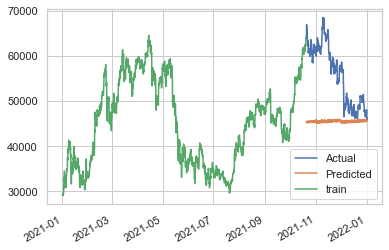

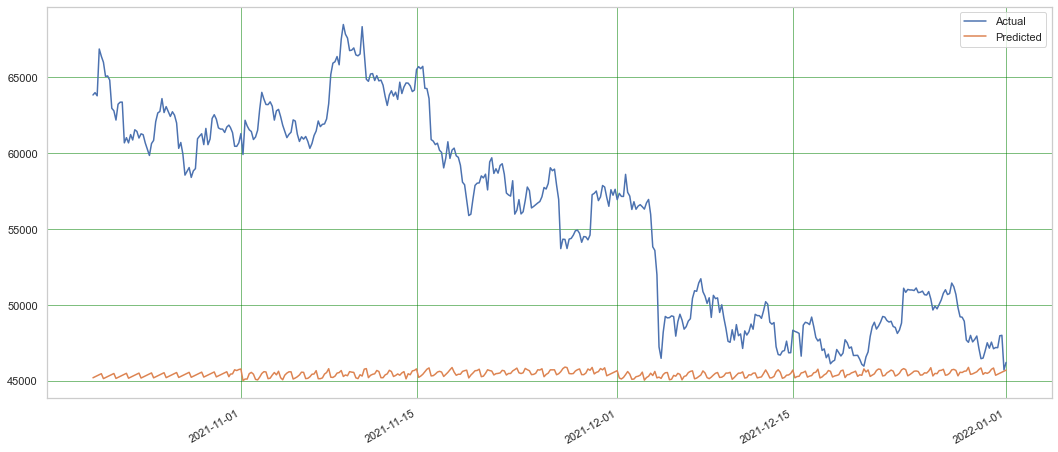

In [132]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [133]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [134]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 51.6 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [135]:
Model_R.best_params_

{'tol': 0.004, 'max_iter': 100, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [136]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  124469313.45926


# MAE

In [137]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  9092.63101


# RMSE

In [138]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  11156.58162


# MAPE

In [139]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.15094


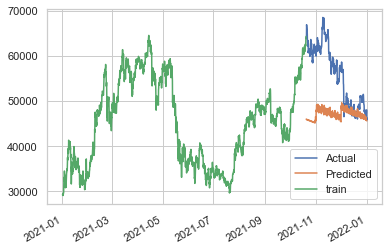

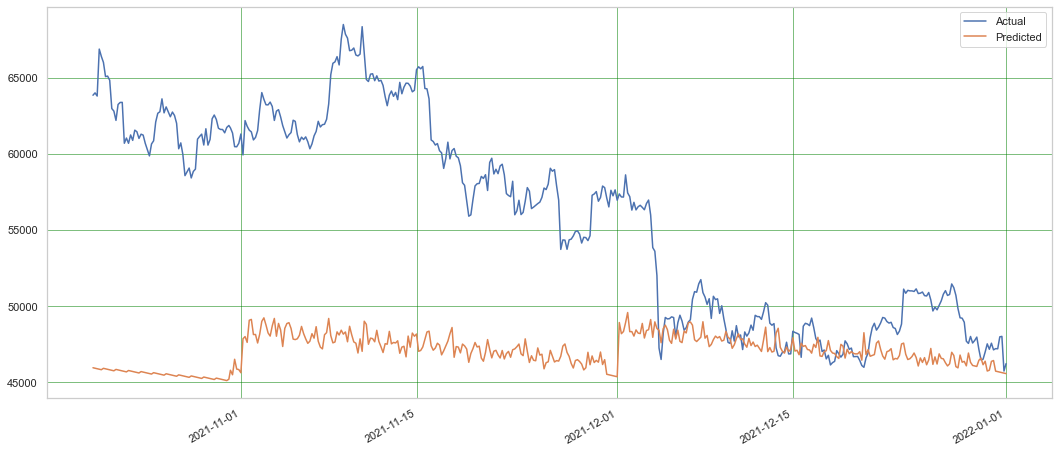

In [140]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [141]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [142]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 1.97 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [143]:
Model_R.best_params_

{'random_state': 30, 'min_samples_leaf': 50, 'max_depth': 10}

# Evaluation Measures on Test data

# MSE

In [144]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  43055712.65048


# MAE

In [145]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  5970.32377


# RMSE

In [146]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  6561.6852


# MAPE

In [147]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.10719


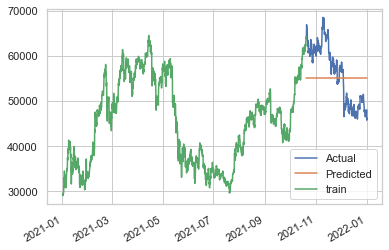

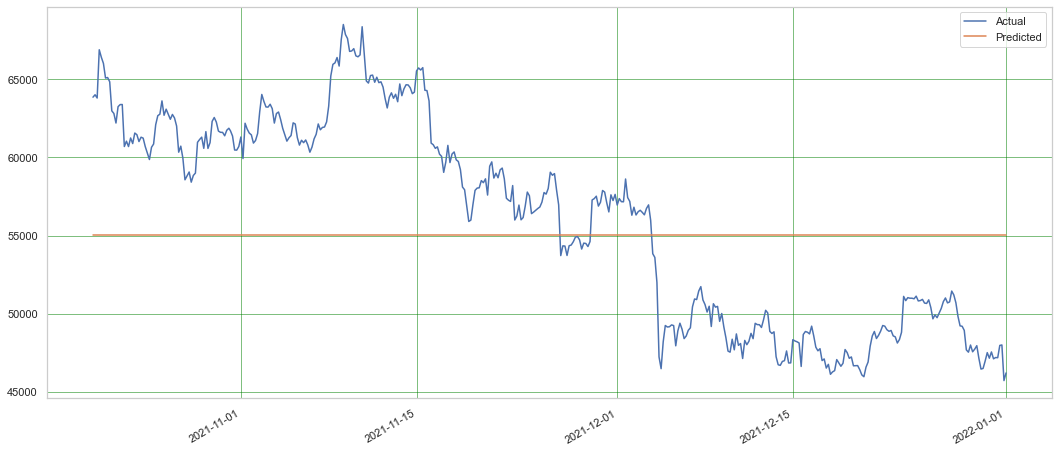

In [148]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [149]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [150]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 24.5 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [151]:
Model_R.best_params_

{'n_estimators': 100, 'max_depth': 30, 'learning_rate': 0.2, 'base_score': 0.2}

# Evaluation Measures on Test data

# MSE

In [152]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  86878003.1878


# MAE

In [153]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  7881.07164


# RMSE

In [154]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  9320.83704


# MAPE

In [155]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.14713


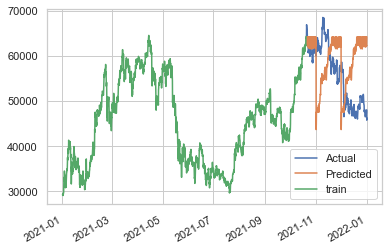

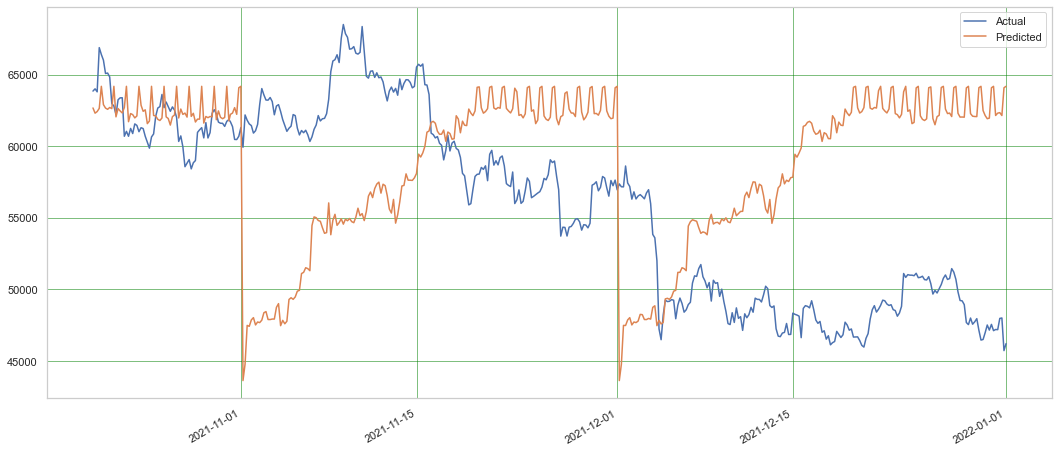

In [156]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [157]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["ARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+---------------+
|          Model          |   MSE score   |
+-------------------------+---------------+
|    SARIMAX Algorithm    |  16306211.677 |
|     ARIMAX Algorithm    |  39239291.657 |
|      MLP Algorithm      | 154187258.775 |
|     Ridge Algorithm     | 124469313.459 |
| Random Forest Algorithm |  43055712.65  |
|      XGB Algorithm      |  86878003.188 |
+-------------------------+---------------+




# Comparison of all algorithms Results on MAE score

In [158]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["SARIMAX Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["ARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|    SARIMAX Algorithm    |  3279.468 |
|     ARIMAX Algorithm    |  4695.126 |
|      MLP Algorithm      |  10575.64 |
|     Ridge Algorithm     |  9092.631 |
| Random Forest Algorithm |  5970.324 |
|      XGB Algorithm      |  7881.072 |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [159]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["ARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|    SARIMAX Algorithm    |  4038.095  |
|     ARIMAX Algorithm    |  6264.127  |
|      MLP Algorithm      | 12417.216  |
|     Ridge Algorithm     | 11156.582  |
| Random Forest Algorithm |  6561.685  |
|      XGB Algorithm      |  9320.837  |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [160]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["ARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|    SARIMAX Algorithm    |   0.061    |
|     ARIMAX Algorithm    |   0.086    |
|      MLP Algorithm      |   0.178    |
|     Ridge Algorithm     |   0.151    |
| Random Forest Algorithm |   0.107    |
|      XGB Algorithm      |   0.147    |
+-------------------------+------------+


